#Ganesh Naraharee Dhere
#R.No:40

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import  mode

In [4]:
data = pd.read_csv('IPHONE_PRICE.csv')
data.head(5)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [5]:
data.shape

(400, 4)

<Axes: xlabel='Salary', ylabel='Age'>

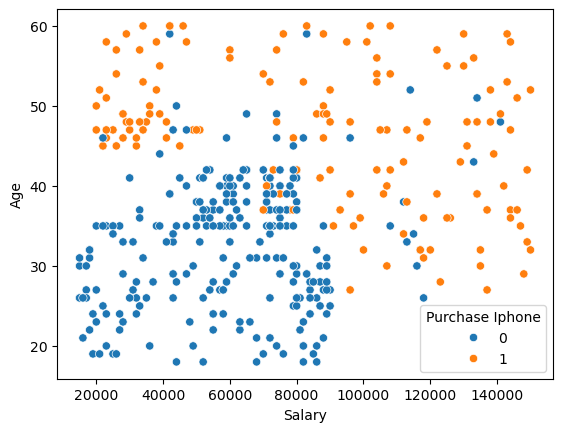

In [6]:
sns.scatterplot(x=data['Salary'],y=data['Age'],hue=data['Purchase Iphone'])

In [7]:
data = data.drop('Gender', axis=1)
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


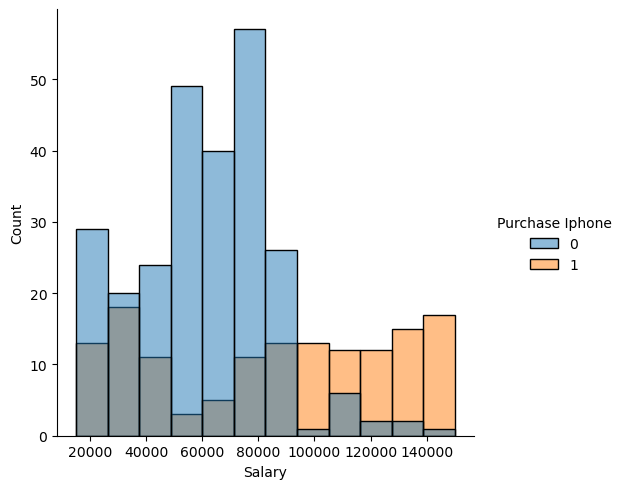

In [8]:
sns.displot(data, x = 'Salary', hue= 'Purchase Iphone')

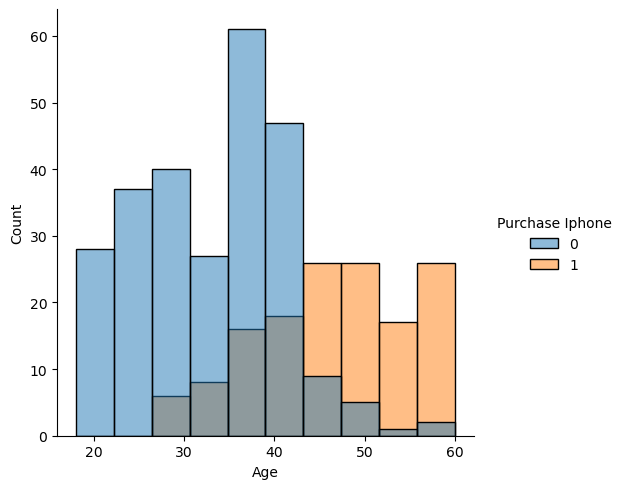

In [9]:
sns.displot(data, x = 'Age', hue = 'Purchase Iphone')

In [10]:
def euclidean_distance(pt1,pt2):
    distance = np.sqrt(np.sum((pt1 - pt2) ** 2))
    return distance
a = np.array([4,5])
b = np.array([6,8])

print(euclidean_distance(a,b))

3.605551275463989


In [11]:
X = data.drop('Purchase Iphone', axis=1)
y = data['Purchase Iphone']

In [12]:
print(X)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]


In [13]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [15]:
print(X_train.shape)

(240, 2)


In [16]:
print(y_train.shape)

(240,)


In [17]:
print(X_test.shape)

(160, 2)


In [18]:
print(y_test.shape)

(160,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier


In [20]:
unknown_value = KNeighborsClassifier(n_neighbors=7)

In [21]:
unknown_value.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [22]:
y_pred=unknown_value.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1])

In [23]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8375


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Text(0, 0.5, 'Mean Error')

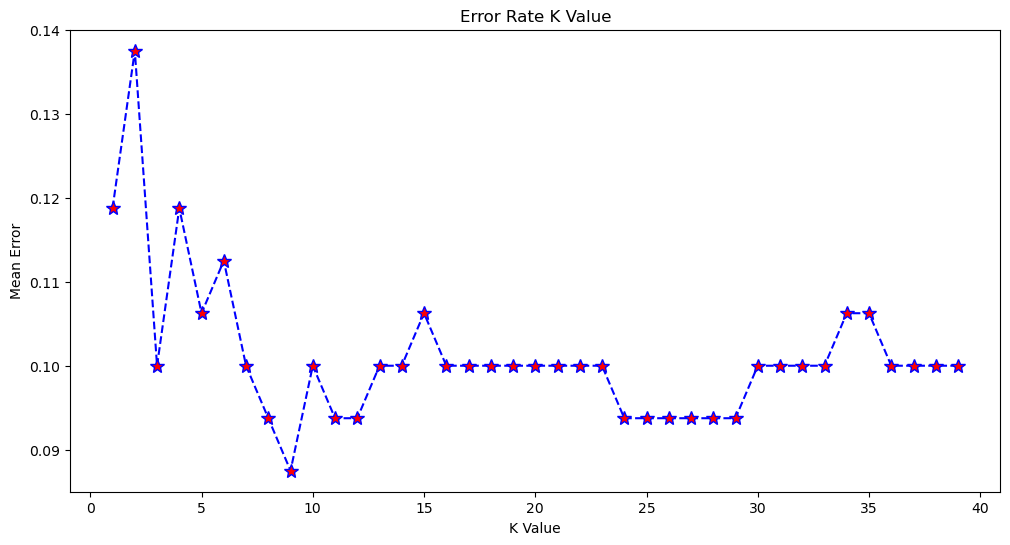

In [25]:
error = []

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='blue', linestyle='dashed', marker = '*', markerfacecolor = 'red' , markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [26]:
data.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [27]:
Age = int(input("Enter New Person Age: "))
Salary = int(input("Enter New person Salary:"))
newperson = [[Age,Salary]]
result = model.predict(sc.transform(newperson))
print(result)

if result == 1:
    print("Person might purchase Iphone")
else:
    print("Person might not purchase Iphone")

[0]
Person might not purchase Iphone


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

print("Confusion matrix:")
print(cm)
print("Accuracy of the Model:{0}".format(accuracy_score(y_test,y_pred)*100))

Confusion matrix:
[[94  7]
 [19 40]]
Accuracy of the Model:83.75


by using Minikowski distance method

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [30]:
data = pd.read_csv('IPHONE_PRICE.csv')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [31]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [32]:
data.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [33]:
x = data[['Gender', 'Age','Salary']]
y = data['Purchase Iphone']

In [34]:
x

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [35]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [39]:
y_pred = knn.predict(X_test_scaled)

In [40]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy : {accuracy:.2f}')

Accuracy : 0.91


In [41]:
Age = int(input("Enter New Person Age: "))
Gender = int(input("Enter New person gender:"))
Salary = int(input("Enter New person Salary:"))
newperson = [[Age,Salary]]
result = model.predict(sc.transform(newperson))
print(result)
if result == 1:
    print("Person might purchase Iphone")
else:
    print("Person might not purchase Iphone")

[0]
Person might not purchase Iphone


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
